# **Imports**

In [222]:
import pandas as pd
from sklearn import datasets
import numpy as np
import math
import matplotlib.pyplot as plt
from K_means import *
from sklearn.datasets import make_blobs
from numpy import dot
from numpy.linalg import norm
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import StandardScaler, normalize
from scipy.sparse.linalg import eigs, eigsh
from spectral_clustering import *
from scipy.spatial.distance import cdist
from sklearn.impute import KNNImputer
from sklearn.metrics import rand_score
from spectral_fonctions import *

# **Data generation**

In [223]:
n_samples = 00
n_features = 10
n_clusters = 4

X, y = make_blobs(n_samples=n_samples, n_features=n_features, centers=n_clusters, random_state=42)

df = pd.DataFrame(X)
df['True_Label'] = y

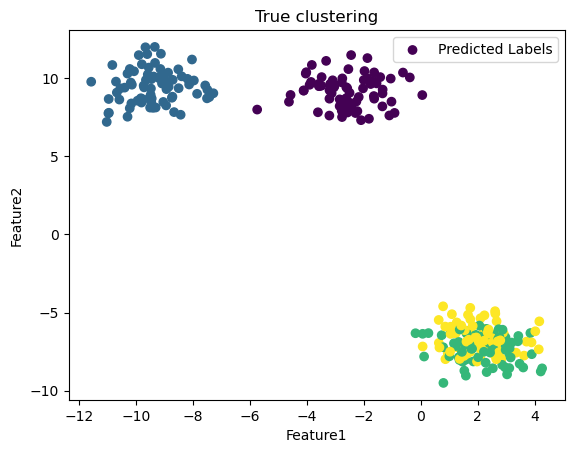

In [224]:
plt.scatter(df[0], df[1], c=df['True_Label'], cmap='viridis', label='Predicted Labels')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.title('True clustering')
plt.legend()
plt.show()

In [225]:
# define noise level
noise_level = 2

# initial synthetic data
X_raw, y = make_blobs(n_samples=n_samples, n_features=n_features, centers=n_clusters, random_state=42)
sc = StandardScaler()
sc.fit(X_raw)
X = sc.transform(X_raw)

# add homoscedatic noise
X_noisy_homoscedastic_raw = X + noise_level * np.random.randn(n_samples, n_features)
sc.fit(X_noisy_homoscedastic_raw)
X_noisy_homoscedastic = sc.transform(X_noisy_homoscedastic_raw)

# normalize data
X_centered = X - X.mean(axis=0)

# add heteroskedastic noise (correlated to the value)
X_noisy_heteroscedastic_raw = X + noise_level * np.random.randn(n_samples, n_features) * X
sc.fit(X_noisy_heteroscedastic_raw)
X_noisy_heteroscedastic = sc.transform(X_noisy_heteroscedastic_raw)

# **Measures**

## **Between models**

### **Regular kmeans**

In [226]:
# stock loss
loss_kmeans = []

# stock accuracy 
accuracy_kmeans = []

# std K-means
kmeans_original = generalized_Kmeans(k=n_clusters, init='forgy', random_seed=42)
kmeans_original.fit(X)
y_original = kmeans_original.predict(X)


# stock loss
loss_kmeans.append(kmeans_original.loss_)
#stock accuracy
accuracy_kmeans.append(rand_score(y, y_original))

# std K-means on homoscedastic noised data
kmeans_homoscedastic = generalized_Kmeans(k=n_clusters, init='forgy', random_seed=42)
kmeans_homoscedastic.fit(X_noisy_homoscedastic)
y_homoscedastic = kmeans_homoscedastic.predict(X_noisy_homoscedastic)

# stock loss
loss_kmeans.append(kmeans_homoscedastic.loss_)
#stock accuracy
accuracy_kmeans.append(rand_score(y, y_homoscedastic))

# std K-means on heteroscedatic noised data
kmeans_heteroscedastic = generalized_Kmeans(k=n_clusters, init='forgy', random_seed=42)
kmeans_heteroscedastic.fit(X_noisy_heteroscedastic)
y_heteroscedastic = kmeans_heteroscedastic.predict(X_noisy_heteroscedastic)

# stock loss
loss_kmeans.append(kmeans_heteroscedastic.loss_)
#stock accuracy
accuracy_kmeans.append(rand_score(y, y_heteroscedastic))

### **Kmeans ++**

In [227]:
# stock loss
loss_kmeans_pp = []
accuracy_kmeans_pp = []

# K-means++
kmeans_pp = generalized_Kmeans(k=n_clusters, init='kmeans++', random_seed=42)
kmeans_pp.fit(X)
y_pp_original = kmeans_pp.predict(X)

# stock loss
loss_kmeans_pp.append(kmeans_pp.loss_)
#stock accuracy
accuracy_kmeans_pp.append(rand_score(y, y_pp_original))

# K-means++ on homoscedastic noised data
kmeans_pp_homoscedastic = generalized_Kmeans(k=n_clusters, init='kmeans++', random_seed=42)
kmeans_pp_homoscedastic.fit(X_noisy_homoscedastic)
y_pp_homoscedastic = kmeans_pp_homoscedastic.predict(X_noisy_homoscedastic)

# stock loss
loss_kmeans_pp.append(kmeans_pp_homoscedastic.loss_)
#stock accuracy
accuracy_kmeans_pp.append(rand_score(y, y_pp_homoscedastic))

# K-means++ on heteroscedatic noised data
kmeans_pp_heteroscedastic = generalized_Kmeans(k=n_clusters, init='kmeans++', random_seed=42)
kmeans_pp_heteroscedastic.fit(X_noisy_heteroscedastic)
y_pp_heteroscedastic = kmeans_pp_heteroscedastic.predict(X_noisy_heteroscedastic)

# stock loss
loss_kmeans_pp.append(kmeans_pp_heteroscedastic.loss_)
#stock accuracy
accuracy_kmeans_pp.append(rand_score(y, y_pp_heteroscedastic))

### **Spectral**

In [236]:
# stock loss
loss_kmeans_spectral = []
accuracy_kmeans_spectral = []

# spectral clustering
labels = final_spectral_clustering_sym(X, gaussian_similarity_function, k_nearest_neighboors= 8, number_of_clusters= n_clusters, weighted=True, eigensolver= compute_matrix_U_ARPACK)
loss = loss_inertia(labels, X)
y_spectral_original = labels

# stock loss
loss_kmeans_spectral.append(loss)
#stock accuracy
accuracy_kmeans_spectral.append(rand_score(y, y_spectral_original))

# spectral clustering on homoscedastic noised data
labels = final_spectral_clustering_sym(X_noisy_homoscedastic, gaussian_similarity_function, k_nearest_neighboors= 8, number_of_clusters= n_clusters, weighted=True, eigensolver= compute_matrix_U_ARPACK)
loss = loss_inertia(labels, X_noisy_homoscedastic)
y_spectral_homoscedastic = labels

# stock loss
loss_kmeans_spectral.append(loss)
#stock accuracy
accuracy_kmeans_spectral.append(rand_score(y, y_spectral_homoscedastic))

# spectral clustering on heteroscedatic noised data
labels = final_spectral_clustering_sym(X_noisy_heteroscedastic, gaussian_similarity_function, k_nearest_neighboors= 8, number_of_clusters= n_clusters, weighted=True, eigensolver= compute_matrix_U_ARPACK)
loss = loss_inertia(labels, X_noisy_heteroscedastic)
y_spectral_heteroscedastic = labels

# stock loss
loss_kmeans_spectral.append(loss)
#stock accuracy
accuracy_kmeans_spectral.append(rand_score(y, y_spectral_heteroscedastic))

### **Visualization**

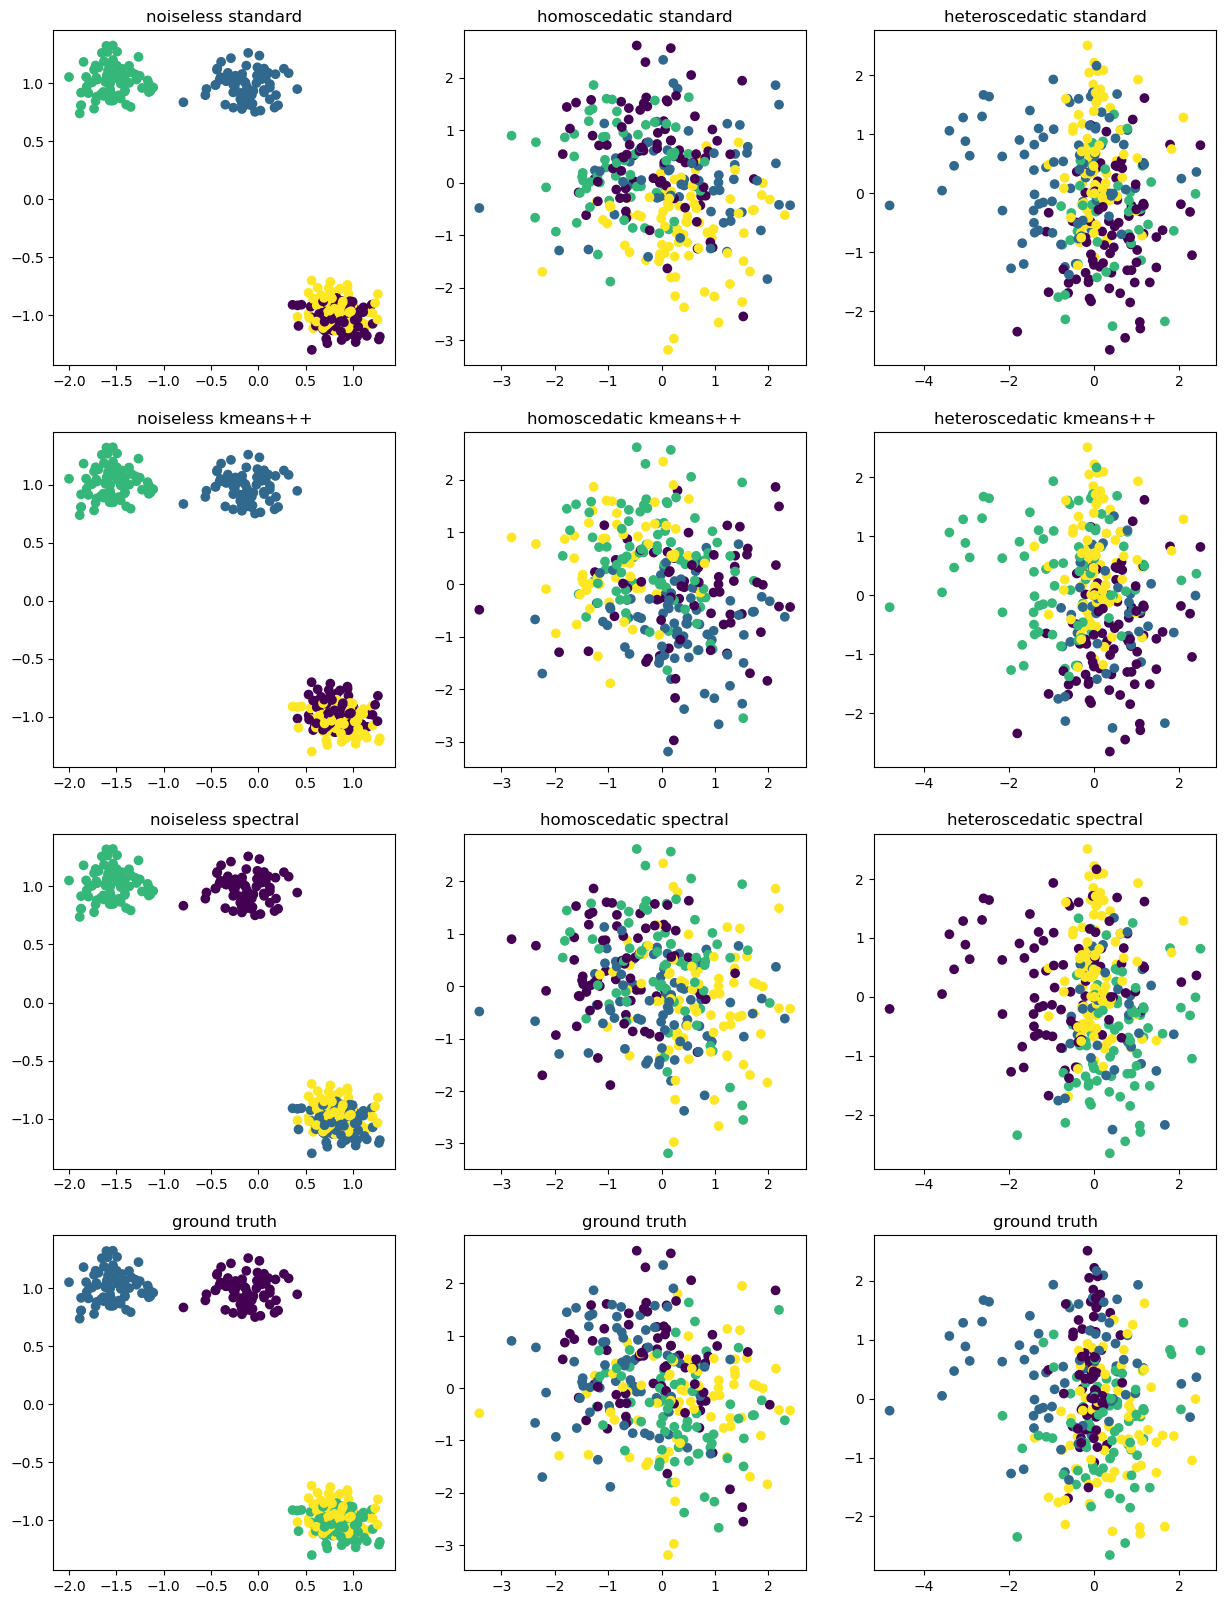

In [237]:
# print clustering
fig = plt.figure(figsize=(15, 20))
axes = fig.subplots(nrows=4, ncols=3)

ax=axes[0,0]
ax.scatter(X[:, 0], X[:, 1], c=y_original, cmap='viridis')
ax.set_title('noiseless standard')

ax=axes[0,1]
ax.scatter(X_noisy_homoscedastic[:, 0], X_noisy_homoscedastic[:, 1], c=y_homoscedastic, cmap='viridis')
ax.set_title('homoscedatic standard')

ax=axes[0,2]
ax.scatter(X_noisy_heteroscedastic[:, 0], X_noisy_heteroscedastic[:, 1], c=y_heteroscedastic, cmap='viridis')
ax.set_title('heteroscedatic standard')

ax=axes[1,0]
ax.scatter(X[:, 0], X[:, 1], c=y_pp_original, cmap='viridis')
ax.set_title('noiseless kmeans++')

ax=axes[1,1]
ax.scatter(X_noisy_homoscedastic[:, 0], X_noisy_homoscedastic[:, 1], c=y_pp_homoscedastic, cmap='viridis')
ax.set_title('homoscedatic kmeans++')

ax=axes[1,2]
ax.scatter(X_noisy_heteroscedastic[:, 0], X_noisy_heteroscedastic[:, 1], c=y_pp_heteroscedastic, cmap='viridis')
ax.set_title('heteroscedatic kmeans++')

ax=axes[2,0]
ax.scatter(X[:, 0], X[:, 1], c=y_spectral_original, cmap='viridis')
ax.set_title('noiseless spectral')

ax=axes[2,1]
ax.scatter(X_noisy_homoscedastic[:, 0], X_noisy_homoscedastic[:, 1], c=y_spectral_homoscedastic, cmap='viridis')
ax.set_title('homoscedatic spectral')

ax=axes[2,2]
ax.scatter(X_noisy_heteroscedastic[:, 0], X_noisy_heteroscedastic[:, 1], c=y_spectral_heteroscedastic, cmap='viridis')
ax.set_title('heteroscedatic spectral')

ax=axes[3,0]
ax.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
ax.set_title('ground truth')

ax=axes[3,1]
ax.scatter(X_noisy_homoscedastic[:, 0], X_noisy_homoscedastic[:, 1], c=y, cmap='viridis')
ax.set_title('ground truth')

ax=axes[3,2]
ax.scatter(X_noisy_heteroscedastic[:, 0], X_noisy_heteroscedastic[:, 1], c=y, cmap='viridis')
ax.set_title('ground truth')

plt.show()

### **Compare loss and accuracy**

In [238]:
# print loss
print(f'loss of standard k-means:', loss_kmeans)

# print accuracy
print(f'accuracy of standard k-means:', accuracy_kmeans, '\n')

# print loss
print(f'loss of k-means++:', loss_kmeans_pp)

# print accuracy
print(f'accuracy of k-means++:', accuracy_kmeans_pp, '\n')

# print loss
print(f'loss of spectral k-means:', loss_kmeans_spectral)

# print accuracy
print(f'accuracy of spectral k-means:', accuracy_kmeans_spectral, '\n')

loss of standard k-means: [187.2287558215278, 2257.8210468277125, 2211.8423798801364]
accuracy of standard k-means: [1.0, 0.7689409141583055, 0.7650613154960981] 

loss of k-means++: [187.2287558215278, 2256.1089038155424, 2209.8658434942654]
accuracy of k-means++: [1.0, 0.7918171683389075, 0.7449052396878484] 

loss of spectral k-means: [187.2287558215278, 2374.056649673335, 2285.943618350288]
accuracy of spectral k-means: [1.0, 0.7484057971014493, 0.753088071348941] 



### **Compare different k**

In [233]:
accuracy_original = []
accuracy_homoscedastic = []
accuracy_heteroscedastic = []
random = []

for k in range(2, 30) :

    # spectral clustering
    labels = final_spectral_clustering_sym(X, gaussian_similarity_function, k_nearest_neighboors= k, number_of_clusters= n_clusters, weighted=True, eigensolver= compute_matrix_U_ARPACK)
    y_spectral_original = labels
    accuracy_original.append(rand_score(y, y_spectral_original))

    # spectral clustering on homoscedastic noised data
    labels = final_spectral_clustering_sym(X_noisy_homoscedastic, gaussian_similarity_function, k_nearest_neighboors= k, number_of_clusters= n_clusters, weighted=True, eigensolver= compute_matrix_U_ARPACK)
    y_spectral_homoscedastic = labels
    accuracy_homoscedastic.append(rand_score(y, y_spectral_homoscedastic))

    # spectral clustering on heteroscedatic noised data
    labels = final_spectral_clustering_sym(X_noisy_heteroscedastic, gaussian_similarity_function, k_nearest_neighboors= k, number_of_clusters= n_clusters, weighted=True, eigensolver= compute_matrix_U_ARPACK)
    y_spectral_heteroscedastic = labels
    accuracy_heteroscedastic.append(rand_score(y, y_spectral_heteroscedastic))

    # random clustering for comparison
    random.append(rand_score(y, np.random.randint(low=0, high = 3, size = y.shape[0])))
    

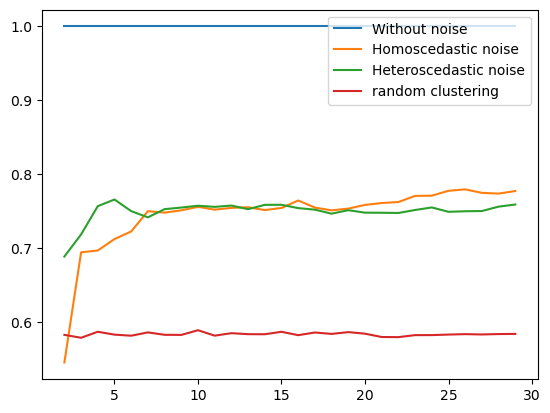

In [235]:
plt.plot(list(range(2, 30)), accuracy_original, label = 'Without noise')
plt.plot(list(range(2, 30)), accuracy_homoscedastic, label = 'Homoscedastic noise')
plt.plot(list(range(2, 30)), accuracy_heteroscedastic, label = 'Heteroscedastic noise')

plt.plot(list(range(2, 30)), random, label = 'random clustering')

plt.legend()
plt.show()

### **Inlfuence of the number of clusters**

We will compare on the homoscedastic noise :

In [245]:
n_samples = 500
n_features = 20
noise_level = 2

accuracy_kmeans = []
accuracy_kmeans_pp = []
accuracy_spectral = []

for cluster_number in range(1, 10) :

    n_clusters = cluster_number

    # initial synthetic data
    X_raw, y = make_blobs(n_samples=n_samples, n_features=n_features, centers=n_clusters, random_state=42)
    sc = StandardScaler()
    sc.fit(X_raw)
    X = sc.transform(X_raw)

    # add homoscedatic noise
    X_noisy_homoscedastic_raw = X + noise_level * np.random.randn(n_samples, n_features)
    sc.fit(X_noisy_homoscedastic_raw)
    X_noisy_homoscedastic = sc.transform(X_noisy_homoscedastic_raw)

    # spectral clustering on homoscedastic noised data
    labels = final_spectral_clustering_sym(X_noisy_homoscedastic, gaussian_similarity_function, k_nearest_neighboors= 7, number_of_clusters= n_clusters, weighted=True, eigensolver= compute_matrix_U_ARPACK)
    y_spectral_homoscedastic = labels
    accuracy_spectral.append(rand_score(y, y_spectral_homoscedastic))

    kmeans_homoscedastic = generalized_Kmeans(k=n_clusters, init='forgy', random_seed=42)
    kmeans_homoscedastic.fit(X_noisy_homoscedastic)
    y_homoscedastic = kmeans_homoscedastic.predict(X_noisy_homoscedastic)
    accuracy_kmeans.append(rand_score(y, y_homoscedastic))

    kmeans_pp_homoscedastic = generalized_Kmeans(k=n_clusters, init='kmeans++', random_seed=42)
    kmeans_pp_homoscedastic.fit(X_noisy_homoscedastic)
    y_pp_homoscedastic = kmeans_pp_homoscedastic.predict(X_noisy_homoscedastic)
    accuracy_kmeans_pp.append(rand_score(y, y_pp_homoscedastic))
    

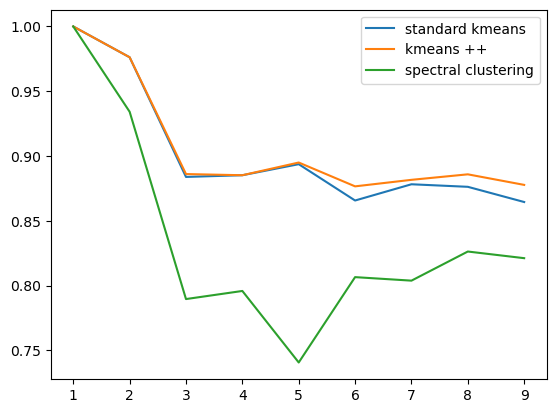

In [246]:
plt.plot(list(range(1, 10)), accuracy_kmeans, label = 'standard kmeans')
plt.plot(list(range(1, 10)), accuracy_kmeans_pp, label = 'kmeans ++')
plt.plot(list(range(1, 10)), accuracy_spectral, label = 'spectral clustering')

plt.legend()
plt.show()

# **Real data**

In [ ]:
# load iris data set

from sklearn import datasets

iris = datasets.load_iris()

data = iris.data + np.random.normal(loc= 0., scale= 1., size = iris.data.shape)
target = iris.target

In [ ]:
noise = 1.

# stock accuracies
accuracy_kmeans = []
accuracy_kmeans_pp = []
accuracy_kmeans_pca =[]

random = []
size =[]

# loop for incresaing noise
for i in range(25):

    data_raw = iris.data + np.random.normal(loc= 0., scale= i * noise , size = iris.data.shape)
    sc = StandardScaler()
    sc.fit(data_raw)
    X = sc.transform(data_raw)

    # standard
    kmeans_iris= generalized_Kmeans(k=n_clusters, init='forgy', random_seed=42)
    kmeans_iris.fit(data)
    y_kmeans = kmeans_iris.predict(data)
    # accuracy
    accuracy_kmeans.append(rand_score(target, y_kmeans))

    # kmeans++
    kmeans_pp_iris = generalized_Kmeans(k=n_clusters, init='kmeans++', random_seed=42)
    kmeans_pp_iris.fit(data)
    y_kmeans_pp = kmeans_pp_iris.predict(data)
    # accuracy
    accuracy_kmeans_pp.append(rand_score(target, y_kmeans_pp))

    # pca guided k means
    y_spectral_iris = final_spectral_clustering_sym(data, gaussian_similarity_function, k_nearest_neighboors= 4, number_of_clusters= n_clusters, weighted=True, eigensolver= compute_matrix_U_ARPACK)
    # accuracy
    accuracy_kmeans_pca.append(rand_score(target, y_spectral_iris))

    # random clustering for comparison
    random.append(rand_score(target, np.random.randint(low=0, high = 3, size = target.shape[0])))

    size.append(i)


plt.plot(size, accuracy_kmeans, label = 'standard k means')
plt.plot(size, accuracy_kmeans_pp, label = 'k means ++')
plt.plot(size, accuracy_kmeans_pca, label = 'spectral clustering')

plt.plot(size, random, label = 'random clustering')

plt.legend()
plt.show()

ArpackNoConvergence: ARPACK error -1: No convergence (1501 iterations, 0/3 eigenvectors converged)